# **Covers de un Siglo Pasado - Década del 70**

En este trabajo, se planteó el análisis de un dataset que contiene canciones de la década de 1970.

# Importación de Librerías.

In [1032]:
import pandas as pd
from wordcloud import WordCloud as wd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import re
#!pip install lingua-language-detector
from lingua import Language, LanguageDetectorBuilder
import seaborn as sns
import numpy as np

# Dataset.

## ¿De qué manera se accedió a los datos?

El dataset fue brindado por la cátedra de la materia Fundamentos de la Ciencia de Datos.

In [1033]:
# Lectura del dataset.
raw_dataset = pd.read_csv("Covers.csv")

Adicionalmente, se utilizó para algunos análisis un dataset sacado de (link), el cual cuenta con nuestros datos extendidos para los años dentros del rango [1920, 2020].

In [1034]:
spotify_dataset = pd.read_csv("data.csv")

## ¿De qué datos se dispone?

Se disponen de 980 filas de 17 columnas en el dataset brindado por la cátedra.

In [1035]:
raw_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,2:42,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,4:03,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970
2,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970
3,Cecilia,Simon & Garfunkel,2:54,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970
4,Spirit In The Sky,Norman Greenbaum,4:02,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,6:15,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979
976,Don’t Cry Out Loud,Melissa Manchester,2:15,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979
977,When You’re In Love With A Beautiful Woman,Dr. Hook,2:54,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979
978,I’ll Never Love This Way Again,Dionne Warwick,2:58,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979


Las variables que podemos hallar en él son:

- ```Track```: texto libre que representa el nombre de la pista.
- ```Artist```: texto libre que representa el nombre del artista.
- ```Duration```: variable con formato string, cuantitativa, que representa la duración de la pista en minutos.
- ```Time_Signature```: variable ''cuantitativa (No seria continua o discreta?) que representa el numero de pulsaciones por compás.
- ```Danceability```: variable cuantitativa que representa que tan bailable es una cancion, basada en el tempo y en la estabilidad y fuerza del ritmo
- ```Energy```: variable cuantitativa que representa una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.
- ```Key```: variable cuantitativa que representa la tonalidad musical en la que está compuesta la canción, representada por un número entero.
    * 0: C
    * 1: C#
    * 2: D
    * 3: D#
    * 4: E
    * 5: F
    * 6: F#
    * 7: G
    * 8: G#
    * 9: A
    * 10: A#
    * 11: B
- ```Loudness```: variable cuantitativa que representa el volumen promedio de la canción, medido en decibelios (dB).
- ```Mode```: variable cuantitativa que representa la modalidad de la pista, indica si la canción está en tono mayor o menor.
- ```Speechiness```: variable cuantitativa que representa la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.
- ```Acousticness```: variable cuantitativa que representa una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.
- ```Instrumentalness```: variable cuantitativa que la presencia de voces, valores más altos representan pistas más instrumentales.
- ```Liveness```: variable cuantitativa que representa una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.
- ```Valence```: Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.
- ```Tempo```: la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).
- ```Popularity```: una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.
- ```Year```: el año en que se lanzó la canción.

In [1036]:
# Mostramos un resumen del dataset.
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

Y ... en el dataset auxiliar.

In [1037]:
spotify_dataset

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.003050,0.1000,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.707000,0.1590,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.014500,0.9460,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.582000,0.1830,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.582000,0.1830,-9.315,0.0307,150.316,0.310,1,8,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169902,4KiYPYpm4ultIp247ftPlI,텅 빈 마음 Empty Heart,['LEE SEUNG HWAN'],249893,10/15/89,1989,0.4290,0.547,0.304,0.000000,0.1430,-14.326,0.0336,74.164,0.157,0,11,35,0
169903,42tFTth2jcF7iSo0RBjfJF,피카부 Peek-A-Boo,['Red Velvet'],189050,11/17/17,2017,0.0868,0.839,0.902,0.002570,0.2720,-3.612,0.0536,114.953,0.639,0,1,69,0
169904,6XP9L7di5JnOc9WaeAW8oe,행복 (Happiness),['Red Velvet'],220987,8/1/14,2014,0.3230,0.727,0.871,0.000006,0.7250,-3.099,0.1580,121.438,0.681,0,10,58,0
169905,3Gpdzw72aBVJSrm5J1leVK,"헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...","['Leessang', 'Jung In']",284627,10/6/09,2009,0.1500,0.523,0.841,0.000000,0.1640,-2.505,0.3310,173.903,0.383,0,10,52,0


# Limpieza del Dataset.

Previo al análisis de los datos, se realizó una búsqueda y limpieza de datos erróneos en el dataset.

## Duplicados.

Se hallaron canciones duplicadas en las que variaba en uno el año de lanzamiento.

In [1038]:
duplicados = raw_dataset.duplicated(subset=["Track", "Artist"], keep=False)
filas_duplicadas = raw_dataset[duplicados]

filas_duplicadas.sort_values("Track")


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
776,Don’t It Make My Brown Eyes Blue,Crystal Gayle,2:38,4,0.587,0.237,6,-16.541,1,0.0407,0.4990,0.000001,0.6140,0.3680,85.383,7,1977
876,Don’t It Make My Brown Eyes Blue,Crystal Gayle,2:38,4,0.587,0.237,6,-16.541,1,0.0407,0.4990,0.000001,0.6140,0.3680,85.383,7,1978
684,How Deep Is Your Love,Bee Gees,3:32,4,0.738,0.868,11,-4.373,0,0.0731,0.0392,0.001690,0.3880,0.3360,122.003,83,1977
783,How Deep Is Your Love,Bee Gees,3:32,4,0.738,0.868,11,-4.373,0,0.0731,0.0392,0.001690,0.3880,0.3360,122.003,83,1978
854,I Love The Nightlife,Alicia Bridges,3:07,4,0.693,0.708,0,-7.816,1,0.0310,0.3090,0.003050,0.0857,0.9490,125.315,48,1978
956,I Love The Nightlife,Alicia Bridges,3:07,4,0.693,0.708,0,-7.816,1,0.0310,0.3090,0.003050,0.0857,0.9490,125.315,48,1979
662,Muskrat Love,Captain & Tennille,3:48,4,0.659,0.257,9,-16.552,1,0.0382,0.8900,0.000140,0.2520,0.2220,102.977,41,1976
762,Muskrat Love,Captain & Tennille,3:48,4,0.659,0.257,9,-16.552,1,0.0382,0.8900,0.000140,0.2520,0.2220,102.977,41,1977
739,You Light Up My Life,Debby Boone,3:36,3,0.333,0.367,2,-10.060,1,0.0291,0.8310,0.000012,0.2620,0.0685,77.986,55,1977
835,You Light Up My Life,Debby Boone,3:36,3,0.333,0.367,2,-10.060,1,0.0291,0.8310,0.000012,0.2620,0.0685,77.986,55,1978


Manualmente, se verificó cuál de los años era el correcto y se eliminaron aquellas entradas incorrectas. Las entradas correctas son coincidentes con la primera aparición.

In [1039]:
clean_dataset = raw_dataset.copy()

clean_dataset = clean_dataset.drop_duplicates(subset=["Track", "Artist"])

clean_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,2:42,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,4:03,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970
2,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970
3,Cecilia,Simon & Garfunkel,2:54,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970
4,Spirit In The Sky,Norman Greenbaum,4:02,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,6:15,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979
976,Don’t Cry Out Loud,Melissa Manchester,2:15,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979
977,When You’re In Love With A Beautiful Woman,Dr. Hook,2:54,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979
978,I’ll Never Love This Way Again,Dionne Warwick,2:58,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979


Se hallaron también registros con el mismo nombre de Track. Ambas canciones existen: su nombre, artista y año son correctos. No obstante, tienen repetidos todos los demás valores.

In [1040]:
# 3. Ver duplicados en base a columnas específicas (ejemplo: 'columna1' y 'columna2')
# Modifica las columnas según sea necesario
duplicados_por_columnas = clean_dataset.duplicated(subset=["Track"], keep=False)
filas_duplicadas_columnas = clean_dataset[duplicados_por_columnas]
filas_duplicadas_columnas = filas_duplicadas_columnas.sort_values("Track")

filas_duplicadas_columnas


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
497,Best Of My Love,Eagles,3:40,4,0.784,0.713,0,-6.865,1,0.0339,0.447000,0.140000,0.0904,0.970,115.443,71,1975
701,Best Of My Love,The Emotions,3:40,4,0.784,0.713,0,-6.865,1,0.0339,0.447000,0.140000,0.0904,0.970,115.443,71,1977
15,Bridge Over Troubled Water,Simon & Garfunkel,4:53,4,0.149,0.206,3,-13.888,1,0.0323,0.822000,0.000649,0.1150,0.264,79.764,68,1970
101,Bridge Over Troubled Water,Aretha Franklin,4:53,4,0.149,0.206,3,-13.888,1,0.0323,0.822000,0.000649,0.1150,0.264,79.764,68,1971
514,Dance With Me,Orleans,3:51,4,0.912,0.511,9,-6.365,1,0.2030,0.025900,0.000000,0.0442,0.611,101.628,63,1975
819,Dance With Me,Peter Brown,3:51,4,0.912,0.511,9,-6.365,1,0.2030,0.025900,0.000000,0.0442,0.611,101.628,63,1978
410,Feel Like Makin’ Love,Roberta Flack,5:13,4,0.543,0.529,7,-9.717,1,0.0301,0.326000,0.002690,0.7090,0.746,85.126,64,1974
509,Feel Like Makin’ Love,Bad Company,5:13,4,0.543,0.529,7,-9.717,1,0.0301,0.326000,0.002690,0.7090,0.746,85.126,64,1975
903,Fire,The Pointer Sisters,3:47,4,0.638,0.831,8,-5.039,1,0.0490,0.142000,0.000000,0.1130,0.649,124.071,72,1979
495,Fire,Ohio Players,3:47,4,0.638,0.831,8,-5.039,1,0.0490,0.142000,0.000000,0.1130,0.649,124.071,72,1975


Para el análisis de track, artista y año se pueden quedar, ya que son datos reales. Son los demás valores (danceability, acousticness y demás) los que están mal.

## Tracks que contienen la palabra *by*.

Se detectaron canciones inexistentes y con artistas extraños.

In [1041]:
# Canciones inexistentes detectadas.
indices = [187, 248, 583, 723]

clean_dataset.loc[indices]


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
187,Down,THE LAZY RIVER,4:21,4,0.541,0.366,11,-10.412,1,0.0748,0.560,0.000001,0.0946,0.168,159.707,82,1972
248,Betcha,"GOLLY, WOW",4:13,4,0.430,0.560,3,-9.620,1,0.0268,0.362,0.000107,0.4950,0.391,72.238,50,1972
583,All,MYSELF,3:38,4,0.585,0.550,11,-7.342,1,0.0255,0.408,0.000040,0.1150,0.839,78.176,81,1976
723,Blinded,THE LIGHT,7:08,4,0.456,0.696,5,-10.000,1,0.0653,0.291,0.000207,0.0853,0.508,142.156,64,1977


Analizamos cada una de las canciones y encontramos la canción original a la que referencian. Por lo tanto, hicimos la corrección de dichos datos.

In [1042]:
# Corregimos el track.
clean_dataset.loc[indices, "Track"] = ["Down by the Lazy River", "Betcha By Golly, Wow", "All by Myself", "Blinded by The Light"]

# Corregimos el artista.
clean_dataset.loc[indices, "Artist"] = ["The Osmonds", "The Stylistics", "Eric Carmen", "Manfred Mann"]

# La que dura aprox. 7:08 es All by Myself mientras que la que dura 3:38 aprox. es Blinded by the Light. O sea, están intercambiados los datos.
clean_dataset.loc[indices]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
187,Down by the Lazy River,The Osmonds,4:21,4,0.541,0.366,11,-10.412,1,0.0748,0.560,0.000001,0.0946,0.168,159.707,82,1972
248,"Betcha By Golly, Wow",The Stylistics,4:13,4,0.430,0.560,3,-9.620,1,0.0268,0.362,0.000107,0.4950,0.391,72.238,50,1972
583,All by Myself,Eric Carmen,3:38,4,0.585,0.550,11,-7.342,1,0.0255,0.408,0.000040,0.1150,0.839,78.176,81,1976
723,Blinded by The Light,Manfred Mann,7:08,4,0.456,0.696,5,-10.000,1,0.0653,0.291,0.000207,0.0853,0.508,142.156,64,1977


## Canciones dobles.

Se hallaron registros en los que se especificaban dos canciones en lugar de una. Los demás datos correspondientes al registro correspondían a una de las canciones o a ninguna de las dos.

In [1043]:
clean_dataset[clean_dataset["Track"].str.contains("/")]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
87,Come Together / Something *,The Beatles,4:17,4,0.524,0.364,9,-12.551,0,0.0310,0.025800,0.433000,0.1320,0.505,167.534,14,1970
89,Whole Lotta Love / Living Loving Maid,Led Zeppelin,5:13,4,0.297,0.934,1,-5.606,1,0.0943,0.000274,0.003740,0.7800,0.384,79.781,0,1970
121,Uncle Albert/Admiral Halsey,Paul & Linda McCartney,4:55,4,0.371,0.507,7,-9.805,1,0.0325,0.580000,0.020100,0.1750,0.535,91.786,59,1971
181,Maggie May/Reason To Believe,Rod Stewart,5:50,4,0.566,0.585,2,-8.733,1,0.0362,0.721000,0.517000,0.0911,0.567,129.475,7,1971
184,Have You Ever Seen The Rain / Hey Tonight,Creedence Clearwater Revival,2:38,4,0.735,0.556,0,-5.863,1,0.0276,0.117000,0.000000,0.0738,0.877,127.983,0,1971
553,One Man Woman/One Woman Man,Paul Anka & Odia Coates,4:32,4,0.627,0.645,11,-6.820,1,0.0293,0.045700,0.000000,0.0655,0.509,91.015,44,1975
564,The Way We Were/Try To Remember,Gladys Knight & the Pips,4:31,4,0.285,0.265,7,-12.542,1,0.0418,0.354000,0.000003,0.7440,0.231,147.194,36,1975
676,Beth / Detroit Rock City,Kiss,2:48,4,0.453,0.286,0,-11.403,1,0.0321,0.807000,0.000034,0.2060,0.345,114.003,11,1976
766,Star Wars Theme/Cantina Band,Meco,3:32,4,0.677,0.915,0,-3.859,1,0.0912,0.001210,0.916000,0.3220,0.545,124.929,36,1977
867,We Will Rock You/We Are The Champions,Queen,3:51,3,0.281,0.634,0,-5.808,1,0.0391,0.236000,0.000013,0.0386,0.329,95.248,31,1978


Por ejemplo, para el registro 676, si bien la canción "Detroit Rock City" es de Kiss, ¡esta salió en el año 1999!

Debido a que la cantidad de registros con estas características es baja y no es posible comprobar la veracidad de todos los datos, se tomó la decisión eliminarlos.

In [1044]:
# Porcentaje de canciones dobles.

canciones_dobles = clean_dataset["Track"].str.contains("/")

p_canciones_dobles = clean_dataset[canciones_dobles].shape[0] / clean_dataset.shape[0]

# Eliminación de las canciones dobles.

clean_dataset = clean_dataset[~canciones_dobles]

print(f"Porcentaje de canciones dobles: {round(p_canciones_dobles * 100, 2)} %")

Porcentaje de canciones dobles: 1.13 %


## Outliers.

### Duration.

Observamos un outlier, la canción "Tubular Belbs", cuya duración es de 26:01:00, según el dataset, y de 48 minutos según Internet. Por lo tanto, la consideramos un dato mal cargado y lo eliminamos:

In [1045]:
duracion_maxima = clean_dataset["Duration"].max()

duration_dataset = clean_dataset[clean_dataset["Duration"] != duracion_maxima]

duration_dataset.sort_values("Duration", ascending=False)

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
381,Also Sprach Zarathustra (2001),Deodato,8:59,4,0.425,0.669,5,-9.481,1,0.0316,0.08440,0.916000,0.9000,0.324,114.751,15,1973
573,That’s The Way Of The World,"Earth, Wind & Fire",8:43,4,0.265,0.969,1,-5.062,1,0.4480,0.01600,0.000223,0.7170,0.302,90.017,15,1975
193,American Pie,Don McLean,8:36,4,0.529,0.482,4,-11.709,0,0.0599,0.70000,0.000000,0.0842,0.492,138.453,77,1972
863,"Dance, Dance, Dance (YOWSAH, Yowsah, Yowsah)",Chic,8:21,4,0.850,0.665,10,-9.404,0,0.0887,0.00964,0.486000,0.0886,0.718,123.166,41,1978
928,Ring My Bell,Anita Ward,8:11,4,0.781,0.556,5,-13.067,0,0.0611,0.06610,0.090700,0.0339,0.968,125.999,61,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Dynomite,Tony Camillo’s Bazuka,1:17,4,0.685,0.403,0,-10.887,1,0.3050,0.00483,0.000000,0.1740,0.546,93.826,23,1975
643,Happy Days,Pratt and McClain,1:16,4,0.212,0.554,0,-8.352,1,0.0473,0.00325,0.859000,0.3240,0.625,137.787,51,1976
645,Love To Love You Baby,Donna Summer,16:48,4,0.622,0.425,10,-16.256,1,0.0520,0.29200,0.000057,0.0498,0.417,96.168,50,1976
920,Promises,Eric Clapton,10:46,4,0.362,0.421,10,-11.699,1,0.0372,0.28100,0.000062,0.0943,0.233,114.669,65,1979


Hay canciones de una duración prolongada (14 y 17 minutos), pero quedan descartados como outliers.

# Preprocesamiento de los datos.

Se realizó una conversión de la duración, hallada en minutos y expresada en strings, a segundos:

In [1046]:
clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].str.split(":")

clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].apply(lambda x: int(x[0]) * 60 + int(x[1]))

clean_dataset.sort_values("Duration", ascending=False)

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
449,Tubular Bells,Mike Oldfield,1561,4,0.374,0.2190,4,-19.104,0,0.0343,0.56400,0.560000,0.1140,0.0579,103.535,47,1974
645,Love To Love You Baby,Donna Summer,1008,4,0.622,0.4250,10,-16.256,1,0.0520,0.29200,0.000057,0.0498,0.4170,96.168,50,1976
920,Promises,Eric Clapton,646,4,0.362,0.4210,10,-11.699,1,0.0372,0.28100,0.000062,0.0943,0.2330,114.669,65,1979
348,Pillow Talk,Sylvia,645,4,0.919,0.3620,8,-8.331,1,0.3680,0.57600,0.000000,0.1340,0.4160,104.987,49,1973
846,Feels So Good,Chuck Mangione,582,4,0.576,0.6030,5,-9.603,1,0.0329,0.45500,0.053700,0.0406,0.5240,103.658,51,1978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Bring The Boys Home,Freda Payne,87,4,0.330,0.2830,0,-15.971,1,0.0610,0.57500,0.094700,0.2350,0.2870,157.963,49,1971
865,What’s Your Name,Lynyrd Skynyrd,87,4,0.889,0.4500,11,-6.852,0,0.0357,0.33400,0.000000,0.3490,0.7830,112.023,36,1978
227,Day Dreaming,Aretha Franklin,80,4,0.213,0.0751,7,-27.103,1,0.0433,0.97100,0.441000,0.1130,0.0346,85.295,58,1972
571,Dynomite,Tony Camillo’s Bazuka,77,4,0.685,0.4030,0,-10.887,1,0.3050,0.00483,0.000000,0.1740,0.5460,93.826,23,1975


# Análisis Univariado.

## Track

Hallamos de interés analizar la cantidad de caracteres en el título de la canción para observar si existe alguna correlación con alguna de las demás variables. Para ello, añadimos al dataset una nueva columna que nos indique lo mencionado.

In [1047]:
track_dataset = clean_dataset.copy()

track_dataset["Track_Length"] = track_dataset["Track"].str.len()

track_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length
0,Abc,The Jackson 5,162,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970,3
1,Let It Be,The Beatles,243,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970,9
2,I Want You Back,The Jackson 5,176,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970,15
3,Cecilia,Simon & Garfunkel,174,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970,7
4,Spirit In The Sky,Norman Greenbaum,242,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,375,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979,24
976,Don’t Cry Out Loud,Melissa Manchester,135,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979,18
977,When You’re In Love With A Beautiful Woman,Dr. Hook,174,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979,42
978,I’ll Never Love This Way Again,Dionne Warwick,178,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979,30


Además, añadimos una columna que nos indique la cantidad de palabras en el track.

In [1048]:
track_dataset["Track_Word_Length"] = track_dataset["Track"].str.split().str.len()

track_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length,Track_Word_Length
0,Abc,The Jackson 5,162,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970,3,1
1,Let It Be,The Beatles,243,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970,9,3
2,I Want You Back,The Jackson 5,176,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970,15,4
3,Cecilia,Simon & Garfunkel,174,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970,7,1
4,Spirit In The Sky,Norman Greenbaum,242,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,375,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979,24,4
976,Don’t Cry Out Loud,Melissa Manchester,135,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979,18,4
977,When You’re In Love With A Beautiful Woman,Dr. Hook,174,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979,42,8
978,I’ll Never Love This Way Again,Dionne Warwick,178,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979,30,6


Se observaron cuáles son las palabras que más se repiten. A su vez, se hizo la misma observación sacando artículos, preposiciones y otras palabras que creemos que no aportan gran valor semántico.

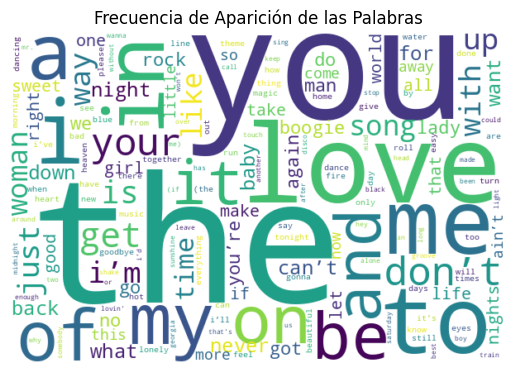

In [1049]:
track_dataset["Track"] = track_dataset["Track"].str.lower()

# A partir de la aparición de las palabras medimos su frecuencia y realizamos un gráfico.
series = track_dataset["Track"].str.split().explode().value_counts().to_dict()

wordcloud = wd(
        #font_path=config.plot.font_path
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(series)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de las Palabras")
plt.show()


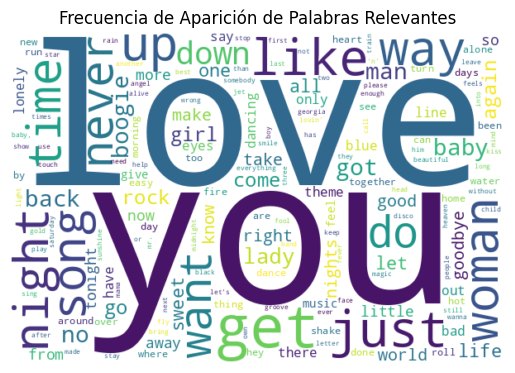

In [1050]:
track_dataset["Track_Transformed"] = track_dataset["Track"].str.replace(r'[()]', '', regex=True)

# Lista de palabras a eliminar.
palabras = ["I’ll", "He’s", "She’s", "You’re", "We’re", "the", "of", "to", "don’t", "won’t", "ain’t", "when", "with", "in", "on", "and", "for",
            "this", "that", "i’m", "a", "me", "my", "i", "is", "be", "it", "what", "your", "how", "&", "gonna", "I’ve", "you’ve", "we’ve", "it’s",
            "’s", "no'", "can’t", "’ve", "’d", "’ll", "an", "at", "will", "we", "if", "why", "us", "could", "I’d", "He’d", "She’d", "We’d"]

# unimos las palabras con el operador |.
patron = r"(?<![\w'()])(" + "|".join(palabras) + r")(?![\w'()])"

# Remplazamos todas las coincidencias, sin distinguir entre mayúsculas y minúsculas
track_dataset["Track_Transformed"] = track_dataset["Track_Transformed"].str.replace(patron, "", regex=True, flags=re.IGNORECASE)
track_dataset["Track_Transformed"] = track_dataset["Track_Transformed"].str.replace(patron, "", regex=True, flags=re.IGNORECASE)

# Mostramos la nube de palabras resultante.
series = track_dataset["Track_Transformed"].str.split().explode().value_counts().to_dict()

wordcloud = wd(
        #font_path=config.plot.font_path
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(series)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de Palabras Relevantes")
plt.show()

¿Siempre que aparece "you" aparece junto a una palabra de índole romántico?

In [1051]:
palabras_romanticas = ["woman", "girl", "lady", "night", "baby", "tonight", "sweet", "hot", "midnight"]

palabras_romanticas_regex = "|".join(palabras_romanticas)

love_tracks = track_dataset[track_dataset["Track_Transformed"].str.contains("love") & track_dataset["Track_Transformed"].str.contains(palabras_romanticas_regex)]

love_tracks

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length,Track_Word_Length,Track_Transformed
68,my baby loves lovin’,White Plains,167,4,0.644,0.651,10,-10.871,1,0.0294,0.3610,0.000000,0.1920,0.871,125.844,36,1970,20,4,baby loves lovin’
333,i’m gonna love you just a little more baby,Barry White,431,4,0.606,0.486,7,-13.553,0,0.0411,0.0111,0.001440,0.0757,0.810,87.568,56,1973,42,9,love you just little more baby
511,how sweet it is (to be loved by you),James Taylor,216,4,0.764,0.628,0,-10.961,1,0.0480,0.3360,0.000000,0.0977,0.823,109.008,64,1975,36,9,sweet loved by you
597,sweet love,Commodores,149,4,0.729,0.571,6,-7.060,1,0.0285,0.4780,0.000000,0.4020,0.833,91.981,69,1976,10,2,sweet love
624,"baby, i love your way (live)",Peter Frampton,281,4,0.518,0.786,7,-5.739,1,0.0357,0.4480,0.000025,0.7000,0.463,72.269,58,1976,28,6,"baby, love way live"
645,love to love you baby,Donna Summer,1008,4,0.622,0.425,10,-16.256,1,0.0520,0.2920,0.000057,0.0498,0.417,96.168,50,1976,21,5,love love you baby
673,i’d really love to see you tonight,England Dan & John Ford Coley,159,4,0.620,0.556,5,-12.044,1,0.0336,0.1840,0.000000,0.3010,0.591,119.170,19,1976,34,7,really love see you tonight
854,i love the nightlife,Alicia Bridges,187,4,0.693,0.708,0,-7.816,1,0.0310,0.3090,0.003050,0.0857,0.949,125.315,48,1978,20,4,love nightlife
977,when you’re in love with a beautiful woman,Dr. Hook,174,4,0.665,0.663,8,-11.367,1,0.0386,0.4850,0.006820,0.1570,0.792,110.656,7,1979,42,8,love beautiful woman


Repetición frecuente de palabras de índole romántico.

¿Están todos los títulos de las canciones en inglés? Para ello, utilizaremos la librería más precisa para reconocimiento de lenguage: lingua.
(También se probaron otras librería, como langdetect y spacy, pero su precisión es relativamente menor).

In [1052]:
languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

track_dataset["Track_Language"] = [
    detector.detect_language_of(x).name for x in track_dataset["Track"]
]

track_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length,Track_Word_Length,Track_Transformed,Track_Language
0,abc,The Jackson 5,162,4,0.682,0.926,3,-2.515,0,0.0607,...,0.000000,0.1900,0.860,105.969,81,1970,3,1,abc,ENGLISH
1,let it be,The Beatles,243,4,0.443,0.403,0,-8.339,1,0.0322,...,0.000000,0.1110,0.410,143.462,78,1970,9,3,let,GERMAN
2,i want you back,The Jackson 5,176,4,0.469,0.538,8,-13.559,1,0.0575,...,0.000114,0.3700,0.885,196.606,78,1970,15,4,want you back,ENGLISH
3,cecilia,Simon & Garfunkel,174,4,0.755,0.876,0,-8.867,1,0.0362,...,0.000005,0.2200,0.954,102.762,76,1970,7,1,cecilia,SPANISH
4,spirit in the sky,Norman Greenbaum,242,4,0.609,0.617,9,-7.091,1,0.0307,...,0.004040,0.1180,0.543,128.903,75,1970,17,4,spirit sky,ENGLISH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,he’s the greatest dancer,Sister Sledge,375,4,0.700,0.815,7,-9.711,0,0.0440,...,0.001240,0.0901,0.837,113.245,14,1979,24,4,greatest dancer,ENGLISH
976,don’t cry out loud,Melissa Manchester,135,4,0.298,0.252,0,-8.950,1,0.0339,...,0.000009,0.1270,0.193,90.955,9,1979,18,4,cry out loud,ENGLISH
977,when you’re in love with a beautiful woman,Dr. Hook,174,4,0.665,0.663,8,-11.367,1,0.0386,...,0.006820,0.1570,0.792,110.656,7,1979,42,8,love beautiful woman,ENGLISH
978,i’ll never love this way again,Dionne Warwick,178,4,0.452,0.434,8,-8.870,1,0.0399,...,0.013900,0.1650,0.247,137.702,5,1979,30,6,never love way again,ENGLISH


Filtramos aquellas filas que no sean inglés y las pasamos a un archivo csv para su análisis manual (¡no queda otra! :c):

In [1053]:
track_dataset[track_dataset["Track_Language"] != "ENGLISH"].to_csv("Languages.csv")

Luego del análisis manual, la única canción que no es cantada en inglés es:

In [1054]:
track_dataset[track_dataset["Track"] == "eres tú"]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length,Track_Word_Length,Track_Transformed,Track_Language
395,eres tú,Mocedades,242,4,0.639,0.399,5,-11.815,1,0.0248,...,0.00056,0.133,0.306,79.113,72,1974,7,2,eres tú,SPANISH


Extraño, ¿no? Pero bueno. Pasando a otro tema, en las palabras más comunes en los tracks se hallaban ain't y gonna. ¿Serán todas las canciones en inglés estadounidenses? Para ello, debemos analizar la nacionalidad de los artistas, lo cual es tema de la próxima sección.

## Artist

Observamos si hay canciones con más de un artista:

In [1055]:
artist_dataset = track_dataset.copy()

featurings = track_dataset[track_dataset["Artist"].str.contains("/")]

featurings

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length,Track_Word_Length,Track_Transformed,Track_Language
95,imagine,John Lennon / Plastic Ono Band,187,4,0.547,0.257,0,-12.358,1,0.0252,...,0.183,0.0935,0.169,75.752,75,1971,7,1,imagine,FRENCH


Retomando lo comenzado en la sección correspondiente a la columna "Track", queremos comprobar que nada uno de los artistas sea estadounidense. Sin embargo, esto no es verdad, "The Beatles" es una banda británica. Sin embargo, ¿cuál es la proporción de bandas estadounidenses? Utilizando la API de MusicBrainzngs obtuvimos la nacionalidad de cada artista.

In [1056]:
# Guardamos lo realizado hasta el momento en un nuevo dataset.
track_dataset.to_csv("Track_Dataset.csv")

# En otro archivo de Python, MusicBrainzngs.py, realizamos la obtención de la nacionalidad de cada artista (lo separamos porque toma más de 10 minutos).

Las búsqueda ofrecidas por la API no son exactas y a veces no se halla el artista con el nombre tal y como aparece en el dataset (a veces, a causa de que el artista es la colaboración entre varios artistas). Por lo tanto, se tuvo que hacer el chequeo manual, uno por uno, de cada uno de los artistas no coincidentes con el nombre proporcionado por la API y separarse las colaboraciones en dos artistas distintos:

In [1057]:
artist_dataset = pd.read_csv("ArtistsNationalities.csv")

differs = artist_dataset[artist_dataset["Artista"] != artist_dataset["Nombre"]].copy()

differs["Checked"] = False
differs["Commentary"] = ""

differs.to_csv("ArtistDiffers.csv")

Además, tuvieron que identificarse y eliminarse repetidos:

In [1058]:
import pandas as pd

# Cargar el archivo CSV
delete = pd.read_csv("CheckedArtists.csv")

# Eliminar los duplicados basados en la columna 'Artist', manteniendo solo la primera aparición
delete_unique = delete.drop_duplicates(subset="Artist", keep="first")

# Guardar el nuevo DataFrame sin duplicados en un archivo CSV
delete_unique.to_csv("UniqueArtists.csv", index=False)

# Contar cuántas veces aparece cada artista
artist_counts = delete_unique["Artist"].value_counts()

# Filtrar aquellos artistas que se repiten más de una vez
repeated_artists = artist_counts[artist_counts > 1].index

# Filtrar el DataFrame original para mostrar solo los artistas repetidos
repeated_rows = delete[delete["Artist"].isin(repeated_artists)]

repeated_rows

,Artist,Nationality


El resultado obtenido es el siguiente:

In [1059]:
artist_dataset = pd.read_csv("UniqueArtists.csv")

artist_dataset

,Artist,Nationality
0,The Jackson 5,US
1,The Beatles,GB
2,Simon & Garfunkel,US
3,Norman Greenbaum,US
4,Edison Lighthouse,GB
...,...,...
512,Frank Mills,CA
513,Bonnie Pointer,US
514,McFadden & Whitehead,US
515,Rickie Lee Jones,US


Durante este proceso, se identificaron artistas que son el mismo, pero que fueron cargados con distintos nombres. Estos fueron registrados en el siguiente csv:

In [1060]:
alternative_names = pd.read_csv("Alternative_Names.csv")

alternative_names

,Artista,Alternative_Name
0,The Jackson 5,The Jacksons
1,The Jackson 5,Jackson 5
2,The Carpenters,Carpenters
3,Dawn,Tony Orlando & Dawn
4,The Brotherhood of Man,Brotherhood of Man
5,The Four Tops,Four Tops
6,Alive N Kickin’,Alive 'n Kickin'
7,Tee Set,Tee-Set
8,Dawn,Tony Orlando and Dawn
9,Grass Roots,The Grass Roots


Finalmente, con los artistas en orden, se revisó la procedencia de estos. De esta forma, se corroboró que la mayoría son estadounidenses:

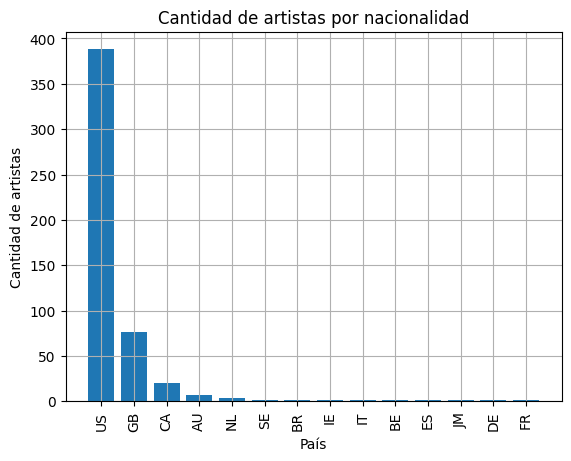

In [1061]:
# Contar cuántas veces se repite cada nacionalidad
nacionalidades = artist_dataset["Nationality"].value_counts()

# Crear el gráfico de barras con las frecuencias de cada nacionalidad
plt.bar(nacionalidades.index, nacionalidades.values)

# Agregar etiquetas a los ejes
plt.xlabel("País")
plt.ylabel("Cantidad de artistas")

# Agregar un título al gráfico
plt.title("Cantidad de artistas por nacionalidad")

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

plt.grid(True)

# Mostrar el gráfico
plt.show()


In [1062]:

fig = px.histogram(artist_dataset, x="Nationality", width=800, height=400)
fig.update_layout(
    xaxis_showgrid=True,
    yaxis_showgrid=True
)
fig.show()

## Duration

In [1063]:
duration_dataset = clean_dataset.copy()

fig = px.scatter(duration_dataset, x="Duration", title='Scatter de Duration', width=800, height=400)

fig.show()

fig = px.scatter(duration_dataset, y="Duration", title='Scatter de Duration', width=800, height=400)

fig.show()

In [1064]:
fig = px.histogram(duration_dataset, x="Duration", title='Scatter de Duration', width=800, height=400)

fig.show()

In [1065]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = duration_dataset["Duration"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(duration_dataset, x="Duration", width=800, height=400, nbins=150)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=(q1 - 1.5 * (q3 - q1)), line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=(q3 + 1.5 * (q3 - q1)), line_color='red')#, annotation='$\mu+3\sigma$')

In [1066]:
media_loudness = duration_dataset["Duration"].mean()
std_loudness = duration_dataset["Duration"].std()
limite_inferior = media_loudness - 3 * std_loudness
limite_superior = media_loudness + 3 * std_loudness

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(duration_dataset, x="Duration", width=800, height=400)
fig.add_vline(x=media_loudness, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=limite_inferior, line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=limite_superior, line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

## Time_Signature

Observamos que el dataset tiene canciones con una pulsación por compas de 1, lo cual es extremadamente raro.

In [1067]:
time_signature_dataset = duration_dataset.copy()

time_signature_1 = time_signature_dataset[time_signature_dataset["Time_Signature"] == 1]

time_signature_1

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
466,Love’s Theme,Love Unlimited Orchestra,202,1,0.262,0.136,9,-19.819,0,0.0284,0.9500,0.90900,0.169,0.113,75.454,37,1974
506,Lucy In The Sky With Diamonds,Elton John,208,1,0.311,0.325,2,-9.042,1,0.0283,0.0469,0.00000,0.139,0.668,65.090,65,1975
563,Love Won’t Let Me Wait,Major Harris,227,1,0.597,0.291,11,-13.837,0,0.0352,0.9170,0.00003,0.122,0.226,115.666,37,1975


Al realizar una búsqueda de estas, nos encontramos con que datos como la duración no concuerdan. Por lo mismo, y considerando que son únicamente tres canciones de las 968 que restan, decidimos eliminarlas:

In [1068]:
time_signature_dataset = time_signature_dataset[time_signature_dataset["Time_Signature"] != 1]

time_signature_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,162,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,243,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970
2,I Want You Back,The Jackson 5,176,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970
3,Cecilia,Simon & Garfunkel,174,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970
4,Spirit In The Sky,Norman Greenbaum,242,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,375,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979
976,Don’t Cry Out Loud,Melissa Manchester,135,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979
977,When You’re In Love With A Beautiful Woman,Dr. Hook,174,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979
978,I’ll Never Love This Way Again,Dionne Warwick,178,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979


También, debido a su baja aparición, observamos aquellas con cinco pulsaciones por compás:

In [1069]:
time_signature_dataset = duration_dataset.copy()

time_signature_5 = time_signature_dataset[time_signature_dataset["Time_Signature"] == 5]

time_signature_5

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
483,I’m Sorry,John Denver,167,5,0.445,0.455,7,-6.405,1,0.0575,0.731,0.000001,0.124,0.1510,109.885,81,1975
871,My Angel Baby,Toby Beau,207,5,0.228,0.116,9,-23.560,0,0.0435,0.965,0.944000,0.152,0.0385,82.294,26,1978


Los detalles de las canciones hallados en Internet no coinciden con los mostrados, en particular, la cantidad de pulsaciones por compás. El número de canciones con estas características es bajo, por lo que su eliminación no afecta al dataset.

### (Indexar canción con cinco pulsaciones por segundo para mostrar la diferencia).

In [1070]:
time_signature_dataset = time_signature_dataset[time_signature_dataset["Time_Signature"] != 5]

time_signature_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,162,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,243,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970
2,I Want You Back,The Jackson 5,176,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970
3,Cecilia,Simon & Garfunkel,174,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970
4,Spirit In The Sky,Norman Greenbaum,242,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,375,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979
976,Don’t Cry Out Loud,Melissa Manchester,135,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979
977,When You’re In Love With A Beautiful Woman,Dr. Hook,174,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979
978,I’ll Never Love This Way Again,Dionne Warwick,178,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979


## Danceability

In [1071]:
danceability_dataset = clean_dataset.copy()

fig = px.box(clean_dataset, x="Danceability", title='Boxplot de Danceability', width=800, height=400, notched=True)

fig.show()

Se analizaron aquellas canciones con danceabilidad menor a 0.185, las cuales parecen ser outliers:

In [1072]:
danceability_dataset[danceability_dataset["Danceability"] < 0.2]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
15,Bridge Over Troubled Water,Simon & Garfunkel,293,4,0.1490,0.206,3,-13.888,1,0.0323,0.82200,0.000649,0.1150,0.26400,79.764,68,1970
101,Bridge Over Troubled Water,Aretha Franklin,293,4,0.1490,0.206,3,-13.888,1,0.0323,0.82200,0.000649,0.1150,0.26400,79.764,68,1971
137,Ain’t No Sunshine,Bill Withers,192,4,0.0942,0.995,2,-27.090,0,0.0514,0.31500,0.970000,0.9570,0.00001,83.334,53,1971
215,Nights In White Satin,The Moody Blues,269,4,0.1950,0.483,4,-4.991,0,0.0300,0.46500,0.497000,0.0686,0.17300,84.710,64,1972
436,The Streak,Ray Stevens,244,4,0.1640,0.949,11,-2.588,0,0.0581,0.00028,0.013400,0.3740,0.25700,99.754,51,1974
921,Ooo Baby Baby,Linda Ronstadt,164,3,0.1850,0.344,7,-9.378,1,0.0295,0.81000,0.000000,0.1660,0.42400,178.635,64,1979
947,You Don’t Bring Me Flowers,Neil Diamond & Barbra Streisand,195,4,0.1600,0.123,0,-18.111,1,0.0400,0.87800,0.000022,0.1570,0.23900,67.006,55,1979


Posterior al análisis, se concluyó que no son outliers, ya que son canciones tristes que realmente no son bailables. Por consiguiente, se tomó la decisión de conservarlos.

In [1073]:
fig = px.histogram(danceability_dataset, x="Danceability", title='Histograma de la Variable Danceabilidad',
                   width=800, height=400, nbins=150)

fig.update_layout(
    xaxis_title_text='Danceability',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.2
)

fig.show()


In [1074]:
fig = px.scatter(danceability_dataset, x="Danceability", width=800, height=400)

fig.show()

## Energy

Como primer paso, se realizó una búsqueda de valores atípicos. Para ello, se analizó un boxplot, un histograma y un scatter de la variable.

In [1075]:
# Boxplot
boxplot = px.box(clean_dataset, x="Energy", title='Boxplot de Energy', width=800, height=400, notched=True)

# Histograma
histogram = px.histogram(clean_dataset, x="Energy", title='Histograma de la Variable Energy',
                         width=800, height=400, nbins=150)

histogram.update_layout(
    xaxis_title_text='Energy',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.2
)

# Scatter
scatter = px.scatter(clean_dataset, x="Energy", width=800, height=400)

# Crear un subplot utilizando las figuras completas
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Boxplot", "Histograma", "Scatter"),
                    specs=[[{"colspan": 2}, None],   # El boxplot ocupa ambas columnas
                           [{}, {}]])               # Segunda fila: histogram y scatter

# Añadir las figuras completas al subplot
fig.add_traces(boxplot.data, rows=1, cols=1)
fig.add_traces(histogram.data, rows=2, cols=1)
fig.add_traces(scatter.data, rows=2, cols=2)

# Actualizar títulos de los ejes
fig.update_xaxes(title_text="Energy", row=1, col=1)  # Eje X del boxplot
fig.update_xaxes(title_text="Energy", row=2, col=1)  # Eje X del histograma
fig.update_xaxes(title_text="Energy", row=2, col=2)  # Eje X del scatter

fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=1)  # Eje Y del 
fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=2)  # Eje Y del histograma

# Actualizar el layout (y restaurar el bargap)
fig.update_layout(
    height=800, 
    width=1000, 
    title_text="Gráficos Combinados",
    bargap=0.2  # Reestablecer el bargap
)

# Mostrar la figura combinada
fig.show()


La concluión de la búsqueda es que no se hallaron valores atípicos. A su vez, con ayuda del histograma y el boxplot, se descubrió una distirbución bastante simétrica de la variable.

## Key


Acorde a la teoría musical, la equivalencia entre las keys y el número colocado es:


In [1076]:
equivalencia_notas = {0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

Siendo las notas más frecuentes halladas en el dataset, ordenadas de mayor frecuencia a menor:

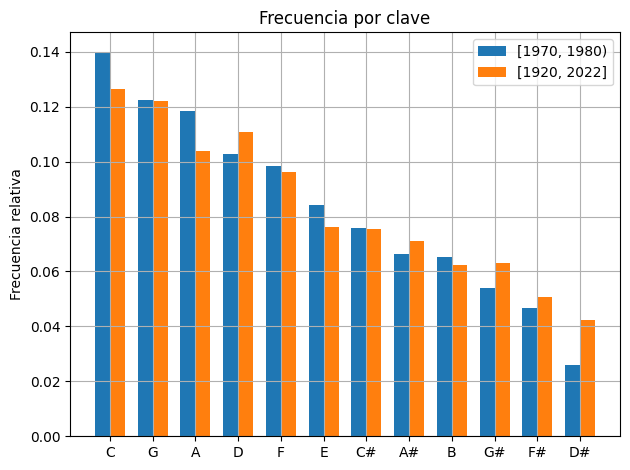

In [1077]:
# Obtenemos las notas más repetidas en nuestro dataset.

key_dataset = energy_dataset.copy()

notas_original = key_dataset["Key"].value_counts()

notas_original = notas_original.astype("float64")

notas_original = notas_original.rename(index=equivalencia_notas)

total_original = key_dataset.shape[0]

# Obtenemos las notas más repetidas en un dataset más amplio.

key_dataset_ampliado = pd.read_csv("data.csv")

notas_ampliado = key_dataset_ampliado["key"].value_counts()

notas_ampliado = notas_ampliado.astype("float64")

notas_ampliado = notas_ampliado.rename(index=equivalencia_notas)

total_ampliado = key_dataset_ampliado.shape[0]

# Combinamos las notas más repetidas en un dataset para compararlas.
combined = pd.DataFrame({'Original': notas_original, 'Ampliado': notas_ampliado}).fillna(0)

# Normalización de las frecuencias relativas
combined['Original'] = combined['Original'] / total_original
combined['Ampliado'] = combined['Ampliado'] / total_ampliado

# Ordenamos el ddataframe por la columna 'Origianl'.
combined = combined.sort_values(by='Original', ascending=False)

x = np.arange(len(combined))  # Posiciones de las etiquetas

width = 0.35  # Ancho de las barras

# Creamos las barras.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, combined['Original'], width, label='[1970, 1980)')
rects2 = ax.bar(x + width/2, combined['Ampliado'], width, label='[1920, 2022]')

# Añadimos etiquetas y un título.
ax.set_ylabel('Frecuencia relativa')
ax.set_title('Frecuencia por clave')
ax.set_xticks(x, combined.index)
ax.legend()

# Mejoramos el diseño.
fig.tight_layout()
plt.grid()

# Mostramos el gráfico.
plt.show()

¿Cómo hacer énfasis en la diferencia?

La frecuencia de aparición de las notas coincide con las estadísticas que podemos hallar en algunas páginas: https://www.hooktheory.com/cheat-sheet/key-popularity.

## Loudness

In [1078]:
loudness_dataset = clean_dataset.copy()

fig = px.box(loudness_dataset, x="Loudness", width=800, height=400)

fig.show()

In [1079]:
loudness_dataset[loudness_dataset["Loudness"] < -20]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
137,Ain’t No Sunshine,Bill Withers,192,4,0.0942,0.99500,2,-27.090,0,0.0514,0.315,0.970000,0.9570,0.00001,83.334,53,1971
226,The First Time Ever I Saw Your Face,Roberta Flack,260,4,0.3110,0.02640,0,-21.644,1,0.0370,0.731,0.002050,0.1560,0.13900,120.653,59,1972
227,Day Dreaming,Aretha Franklin,80,4,0.2130,0.07510,7,-27.103,1,0.0433,0.971,0.441000,0.1130,0.03460,85.295,58,1972
245,Garden Party,Ricky Nelson,229,4,0.7740,0.24700,2,-21.657,1,0.0779,0.786,0.018600,0.1160,0.80300,143.955,51,1972
316,Clair,Gilbert O’Sullivan,268,4,0.3350,0.00532,1,-31.646,1,0.0376,0.994,0.912000,0.0621,0.03970,65.832,65,1973
666,That’ll Be The Day,Linda Ronstadt,158,4,0.5600,0.14000,1,-20.439,1,0.0325,0.862,0.968000,0.0927,0.05890,74.483,32,1976
731,I’m In You,Peter Frampton,96,4,0.4850,0.00880,5,-30.000,1,0.0507,0.996,0.940000,0.1140,0.18900,85.778,58,1977
820,Jack And Jill,Raydio,99,4,0.5190,0.02650,7,-26.128,1,0.0554,0.992,0.940000,0.0986,0.52300,98.470,63,1978
834,Three Times A Lady,Commodores,217,3,0.3900,0.08030,8,-20.518,1,0.0306,0.874,0.000639,0.1270,0.18400,150.503,55,1978
871,My Angel Baby,Toby Beau,207,5,0.2280,0.11600,9,-23.560,0,0.0435,0.965,0.944000,0.1520,0.03850,82.294,26,1978


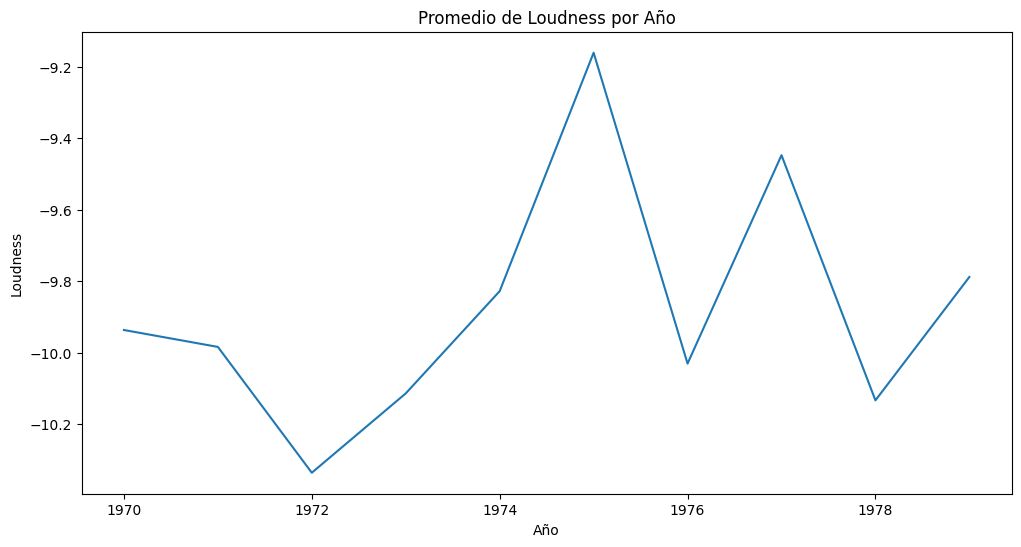

In [1080]:
# Calcular la media de Speechiness por año
loudness_by_year = loudness_dataset.groupby('Year')['Loudness'].mean().reset_index()

# Visualizar la tendencia de Speechiness a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Loudness', data=loudness_by_year)
plt.title('Promedio de Loudness por Año')
plt.ylabel('Loudness')
plt.xlabel('Año')
plt.show()

Comprobamos

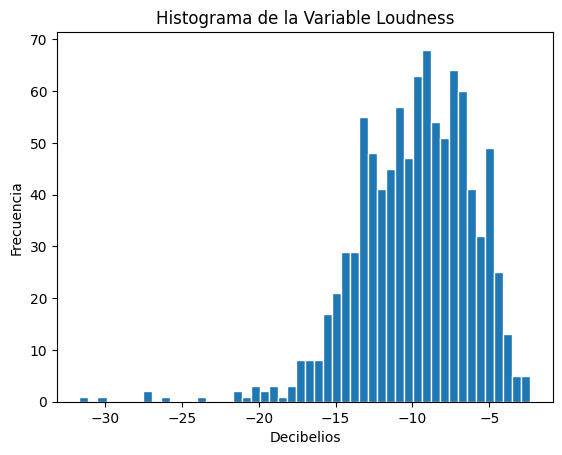

In [1081]:
# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(loudness_dataset["Loudness"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Decibelios")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Loudness")

# Mostrar el gráfico
plt.show()


Sesgo a izquierda.


Al tener las canciones un rango alto de posibles decibeles, produce que sea necesario estar cambiando el volumen constantemente. Por eso, ahora se normalizan los valores.

In [1082]:
fig = px.scatter(loudness_dataset, x="Loudness", width=800, height=400)

fig.show()

In [1083]:
media_loudness = loudness_dataset["Loudness"].mean()
std_loudness = loudness_dataset["Loudness"].std()
limite_inferior = media_loudness - 3 * std_loudness
limite_superior = media_loudness + 3 * std_loudness

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(loudness_dataset, x="Loudness", width=800, height=400)
fig.update_layout(bargap=0.2)
fig.add_vline(x=media_loudness, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=limite_inferior, line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=limite_superior, line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

In [1084]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = loudness_dataset["Loudness"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(loudness_dataset, x="Loudness", width=800, height=400)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=q1, line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=q3, line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

Los datos a la izquierda de la línea roja marcan el 25 % de los datos. Entre las líneas rojas tenemos un 50 % de los datos, el rango intercuartiles. A la derecha de la segunda línea roja hay un 25 % de los rangos.

Si el dato tiene un valor pur fuera del rango Q_1 - k . IQR o Q_3 + k . IQR podría ser catalogado como outlier. Usualmente, k = 1.5.

In [1085]:
fig = px.box(loudness_dataset, x="Loudness", width=800, height=400)

fig.show()

In [1086]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = loudness_dataset["Loudness"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(loudness_dataset, x="Loudness", width=800, height=400)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=(q1 - 1.5 * (q3 - q1)), line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=(q3 + 1.5 * (q3 - q1)), line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

## Mode

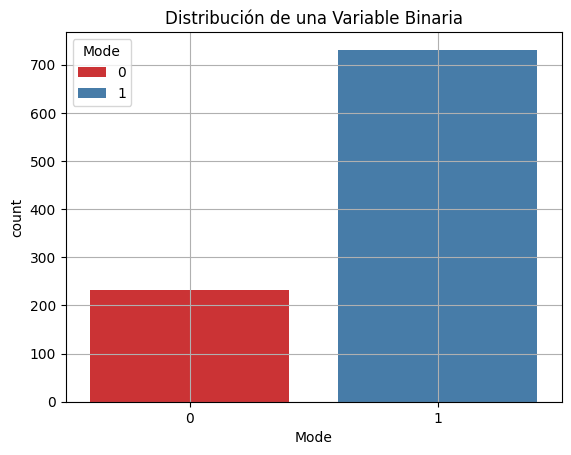

In [1087]:
sns.countplot(x='Mode', data=clean_dataset, palette='Set1', hue='Mode')
plt.title('Distribución de una Variable Binaria')
plt.grid(True)
plt.show()

## Speechiness

In [1088]:
# Boxplot
boxplot = px.box(clean_dataset, x="Speechiness", title='Boxplot de Speechiness', width=800, height=400, notched=True)

# Histograma
histogram = px.histogram(clean_dataset, x="Speechiness", title='Histograma de la Variable Speechiness',
                         width=800, height=400, nbins=150)

histogram.update_layout(
    xaxis_title_text='Speechiness',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.2
)

# Scatter
scatter = px.scatter(clean_dataset, x="Speechiness", width=800, height=400)

# Crear un subplot utilizando las figuras completas
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Boxplot", "Histograma", "Scatter"),
                    specs=[[{"colspan": 2}, None],   # El boxplot ocupa ambas columnas
                           [{}, {}]])               # Segunda fila: histogram y scatter

# Añadir las figuras completas al subplot
fig.add_traces(boxplot.data, rows=1, cols=1)
fig.add_traces(histogram.data, rows=2, cols=1)
fig.add_traces(scatter.data, rows=2, cols=2)

# Actualizar títulos de los ejes
fig.update_xaxes(title_text="Speechiness", row=1, col=1)  # Eje X del boxplot
fig.update_xaxes(title_text="Speechiness", row=2, col=1)  # Eje X del histograma
fig.update_xaxes(title_text="Speechiness", row=2, col=2)  # Eje X del scatter

fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=1)  # Eje Y del 
fig.update_yaxes(title_text="Cantidad de Registros", row=2, col=2)  # Eje Y del histograma

# Actualizar el layout (y restaurar el bargap)
fig.update_layout(
    height=800, 
    width=1000, 
    title_text="Gráficos Combinados",
    bargap=0.2  # Reestablecer el bargap
)

# Mostrar la figura combinada
fig.show()


In [1089]:
# Rango Intercuartiles (IRQ): diferencia entre los percentiles 25 y 75.
# Para distribuciones no normales.
qs = clean_dataset["Speechiness"].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Dibujo la distribución con los límites superpuestos.
fig = px.histogram(clean_dataset, x="Speechiness", width=800, height=400, nbins=150)
fig.add_vline(x=q2, line_color='black', annotation_text=r"$\\mu$") #, annotation_text='$\mu$')
fig.add_vline(x=(q1 - 1.5 * (q3 - q1)), line_color='red')#, annotation_text='$\mu-3\sigma$')
fig.add_vline(x=(q3 + 1.5 * (q3 - q1)), line_color='red')#, annotation='$\mu+3\sigma$')

fig.show()

In [1090]:
n = clean_dataset[clean_dataset["Speechiness"] > 0.1].count()

n

Track               103
Artist              103
Duration            103
Time_Signature      103
Danceability        103
Energy              103
Key                 103
Loudness            103
Mode                103
Speechiness         103
Acousticness        103
Instrumentalness    103
Liveness            103
Valence             103
Tempo               103
Popularity          103
Year                103
dtype: int64

## Acousticness

MEDIDA DE PROBABILIDAD.

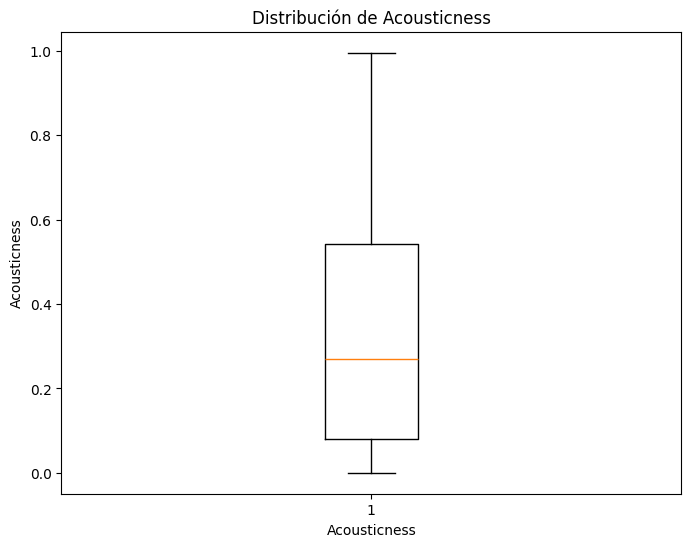

In [1091]:
acousticness_dataset = clean_dataset.copy()

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(acousticness_dataset["Acousticness"])

# Agregar etiquetas a los ejes
plt.xlabel("Acousticness")
plt.ylabel("Acousticness")

# Agregar un título al gráfico
plt.title("Distribución de Acousticness")

# Mostrar el gráfico
plt.show()


In [1092]:
fig = px.scatter(acousticness_dataset, x="Acousticness", width=800, height=400)

fig.show()

## Instrumentalness

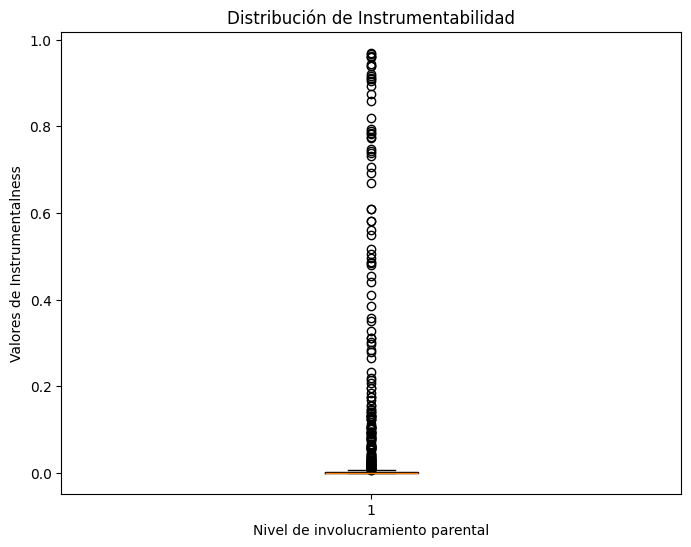

In [1093]:
instrumentalness_dataset = clean_dataset.copy()

import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(instrumentalness_dataset["Instrumentalness"])

# Agregar etiquetas a los ejes
plt.xlabel("Nivel de involucramiento parental")
plt.ylabel("Valores de Instrumentalness")

# Agregar un título al gráfico
plt.title("Distribución de Instrumentabilidad")

# Mostrar el gráfico
plt.show()


In [1094]:
instrumentalness_dataset[instrumentalness_dataset["Instrumentalness"] > 0.8]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
137,Ain’t No Sunshine,Bill Withers,192,4,0.0942,0.99500,2,-27.090,0,0.0514,0.31500,0.970,0.9570,0.00001,83.334,53,1971
316,Clair,Gilbert O’Sullivan,268,4,0.3350,0.00532,1,-31.646,1,0.0376,0.99400,0.912,0.0621,0.03970,65.832,65,1973
342,Why Can’t We Live Together,Timmy Thomas,328,4,0.8370,0.32200,10,-10.161,1,0.0356,0.81000,0.875,0.0966,0.96200,104.499,53,1973
345,Hocus Pocus,Focus,402,4,0.2670,0.72200,2,-7.344,1,0.1020,0.00596,0.893,0.3500,0.34700,184.093,50,1973
350,Dueling Banjos,Eric Weissberg & Steve Mandell,194,4,0.4170,0.48400,9,-8.781,1,0.0791,0.40900,0.959,0.0663,0.50100,149.790,48,1973
379,Ain’t No Woman (LIKE The One I’ve Got),The Four Tops,157,4,0.5190,0.71000,9,-10.908,0,0.0362,0.66500,0.963,0.0889,0.67000,102.585,18,1973
381,Also Sprach Zarathustra (2001),Deodato,539,4,0.4250,0.66900,5,-9.481,1,0.0316,0.08440,0.916,0.9000,0.32400,114.751,15,1973
466,Love’s Theme,Love Unlimited Orchestra,202,1,0.2620,0.13600,9,-19.819,0,0.0284,0.95000,0.909,0.1690,0.11300,75.454,37,1974
569,The Rockford Files Theme,Mike Post,186,4,0.4890,0.56200,2,-11.494,1,0.0301,0.06710,0.920,0.1910,0.23000,111.921,28,1975
643,Happy Days,Pratt and McClain,76,4,0.2120,0.55400,0,-8.352,1,0.0473,0.00325,0.859,0.3240,0.62500,137.787,51,1976


In [1095]:
instrumentalness_dataset[instrumentalness_dataset["Instrumentalness"] == instrumentalness_dataset["Instrumentalness"].min()]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,162,4,0.682,0.926,3,-2.515,0,0.0607,0.0404,0.0,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,243,4,0.443,0.403,0,-8.339,1,0.0322,0.6310,0.0,0.1110,0.410,143.462,78,1970
5,Love Grows (WHERE My Rosemary Goes),Edison Lighthouse,174,4,0.568,0.824,9,-4.613,1,0.0299,0.4030,0.0,0.0855,0.753,108.625,73,1970
9,In The Summertime,Mungo Jerry,211,4,0.754,0.449,4,-14.013,1,0.0615,0.7240,0.0,0.1620,0.973,82.751,71,1970
11,War,Edwin Starr,156,4,0.633,0.664,10,-5.037,1,0.0294,0.4600,0.0,0.1080,0.268,115.058,69,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Chuck E.’S In Love,Rickie Lee Jones,209,4,0.792,0.267,9,-16.974,1,0.1030,0.2840,0.0,0.1440,0.718,113.402,40,1979
970,In The Navy,Village People,225,4,0.759,0.889,7,-10.592,0,0.0502,0.1250,0.0,0.0410,0.886,126.201,38,1979
971,Mama Can’t Buy You Love,Elton John,244,4,0.529,0.432,5,-14.245,1,0.0333,0.5240,0.0,0.1150,0.555,94.382,36,1979
973,We’ve Got Tonight,Bob Seger & The Silver Bullet Band,215,4,0.379,0.387,8,-9.283,1,0.0278,0.7570,0.0,0.1030,0.222,61.530,26,1979


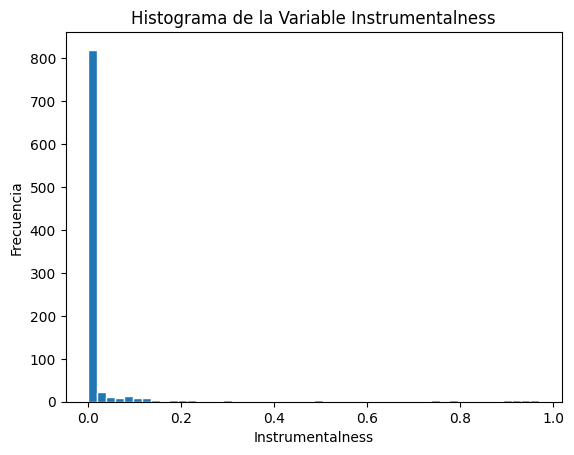

In [1096]:
import matplotlib.pyplot as plt

# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(instrumentalness_dataset["Instrumentalness"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Instrumentalness")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Instrumentalness")

# Mostrar el gráfico
plt.show()


Y ¿si la voz en ocasiones se interpreta como un instrumento?

Instrumentalnesss alto: no contiene palabras explícitas, palabras claras.

instrumentalness: Predicts whether a track contains  no vocals. “Ooh” and “aah” sounds are treated as instrumental in this  context. Rap or spoken word tracks are clearly “vocal”. The closer the  instrumentalness value is to 1.0, the greater likelihood the track  contains no vocal content. Values above 0.5 are intended to represent  instrumental tracks, but confidence is higher as the value approaches  1.0.

In [1097]:
fig = px.scatter(acousticness_dataset, x="Instrumentalness", width=800, height=400)

fig.show()

In [1098]:
fig = px.histogram(acousticness_dataset, x="Instrumentalness", width=800, height=400, nbins=50)

fig.show()

## Liveness

MEDIDA DE PROBABILIDAD.

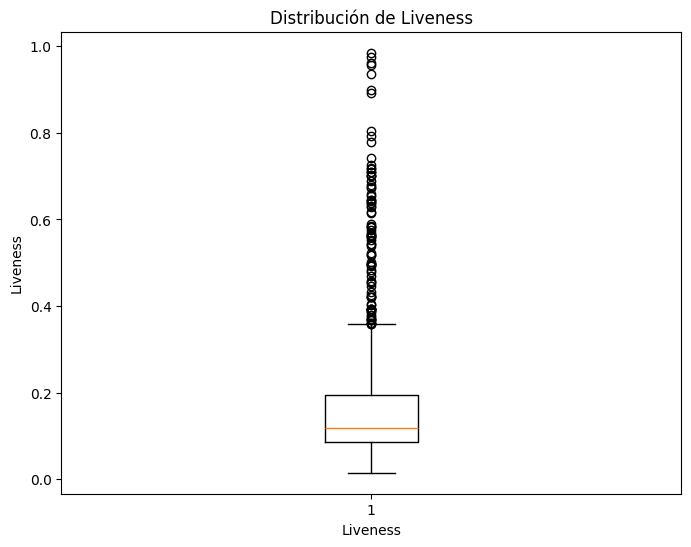

In [1099]:
liveness_dataset = clean_dataset.copy()

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(loudness_dataset["Liveness"])

# Agregar etiquetas a los ejes
plt.xlabel("Liveness")
plt.ylabel("Liveness")

# Agregar un título al gráfico
plt.title("Distribución de Liveness")

# Mostrar el gráfico
plt.show()


In [1100]:
fig = px.scatter(liveness_dataset, x="Liveness", width=800, height=400)

fig.show()

In [1101]:
fig = px.histogram(liveness_dataset, x="Liveness", width=800, height=400, nbins=50)

fig.show()

## Valence

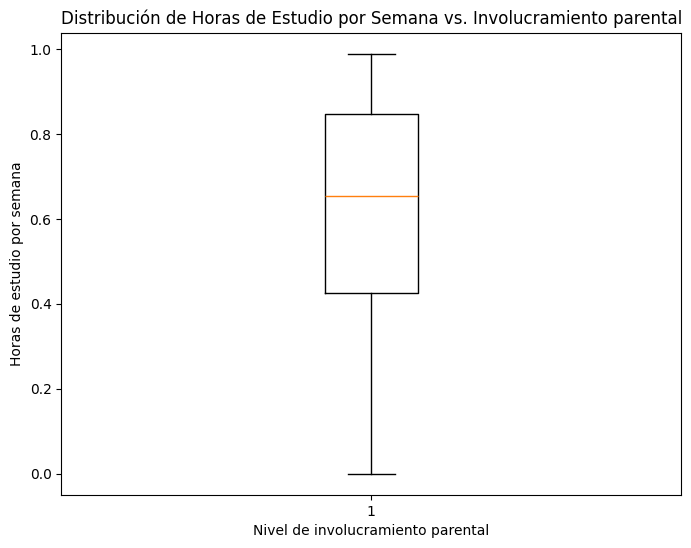

In [1102]:
valence_dataset = clean_dataset.copy()

import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(valence_dataset["Valence"])

# Agregar etiquetas a los ejes
plt.xlabel("Nivel de involucramiento parental")
plt.ylabel("Horas de estudio por semana")

# Agregar un título al gráfico
plt.title("Distribución de Horas de Estudio por Semana vs. Involucramiento parental")

# Mostrar el gráfico
plt.show()


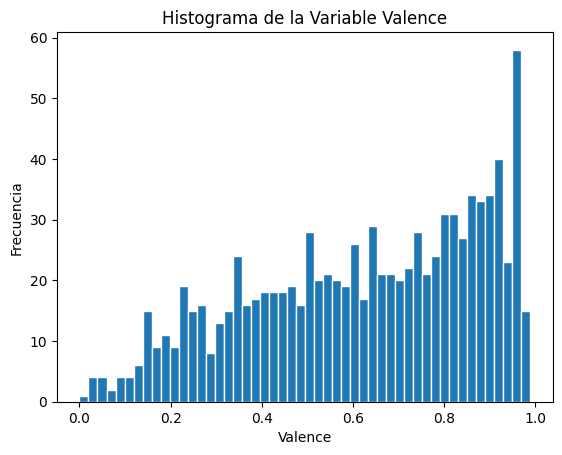

In [1103]:
# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(valence_dataset["Valence"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Valence")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Valence")

# Mostrar el gráfico
plt.show()

Sesgo a izquierda.

In [1104]:
fig = px.scatter(valence_dataset, x="Valence", width=800, height=400)

fig.show()

## Tempo

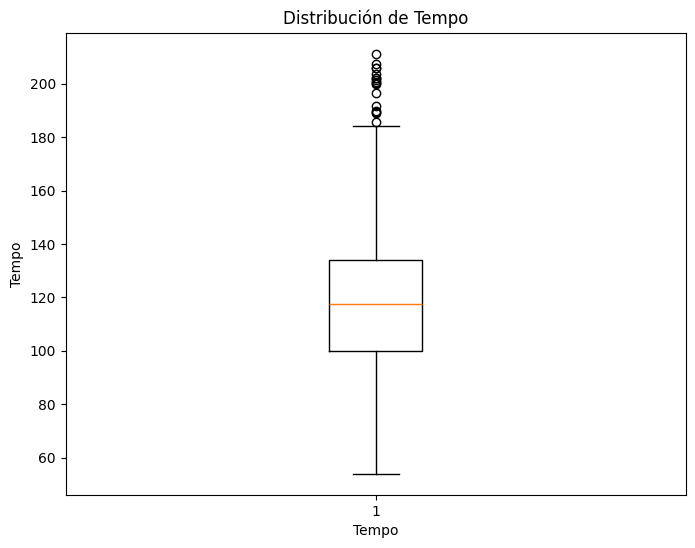

In [1105]:
tempo_dataset = clean_dataset.copy()

import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(tempo_dataset["Tempo"])

# Agregar etiquetas a los ejes
plt.xlabel("Tempo")
plt.ylabel("Tempo")

# Agregar un título al gráfico
plt.title("Distribución de Tempo")

# Mostrar el gráfico
plt.show()


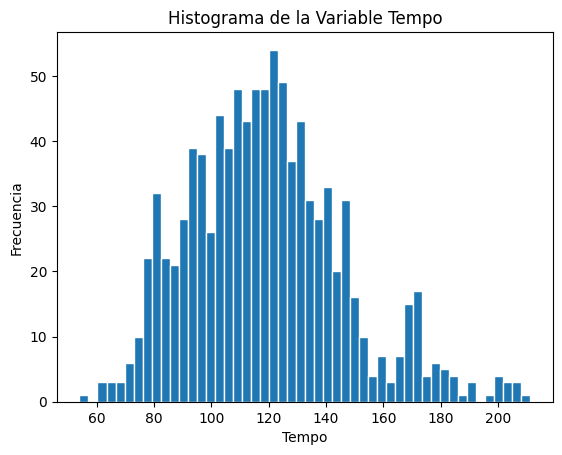

In [1106]:
# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(tempo_dataset["Tempo"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Tempo")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Tempo")

# Mostrar el gráfico
plt.show()

In [1107]:
fig = px.scatter(tempo_dataset, x="Tempo", width=800, height=400)

fig.show()

## Popularity

In [1108]:
fig = px.scatter(clean_dataset, x="Popularity", width=800, height=400)

fig.show()

In [1109]:
fig = px.histogram(clean_dataset, x="Popularity", width=800, height=400, nbins=50)

fig.show()

## Year

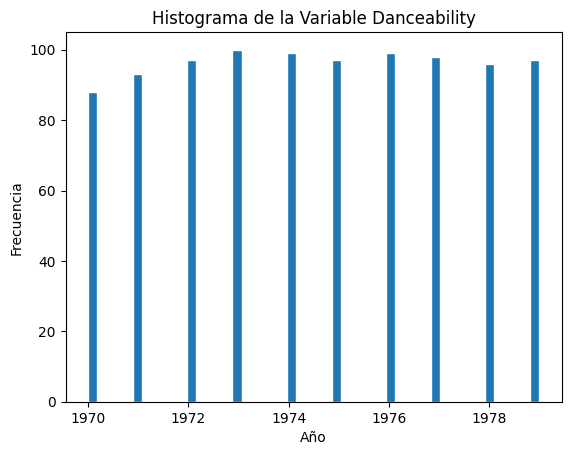

In [1110]:
year_dataset = clean_dataset.copy()

# Definir el número de bins
bins = 50
# bins = 10
# bins = 20

# Crear el histograma con bordes entre los bins
plt.hist(year_dataset["Year"], bins=bins, edgecolor='white')

# Agregar etiquetas a los ejes
plt.xlabel("Año")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Danceability")

# Mostrar el gráfico
plt.show()

Hay una distribución equitativa de canciones en cada uno de los años.

In [1111]:
fig = px.scatter(year_dataset, x="Year", width=800, height=400)

fig.show()

# Bivariado

## Mode y Valence

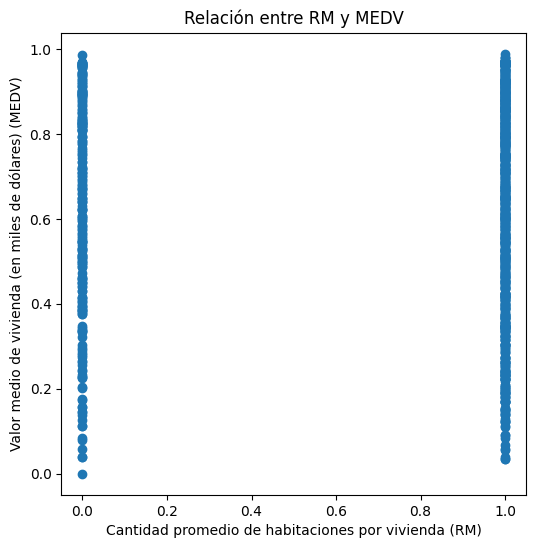

In [1112]:
aux = clean_dataset.copy()

# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(aux["Mode"], aux["Valence"])

# Agregar etiquetas a los ejes
plt.xlabel("Cantidad promedio de habitaciones por vivienda (RM)")
plt.ylabel("Valor medio de vivienda (en miles de dólares) (MEDV)")

# Agregar un título al gráfico
plt.title("Relación entre RM y MEDV")

# Mostrar el gráfico
plt.show()



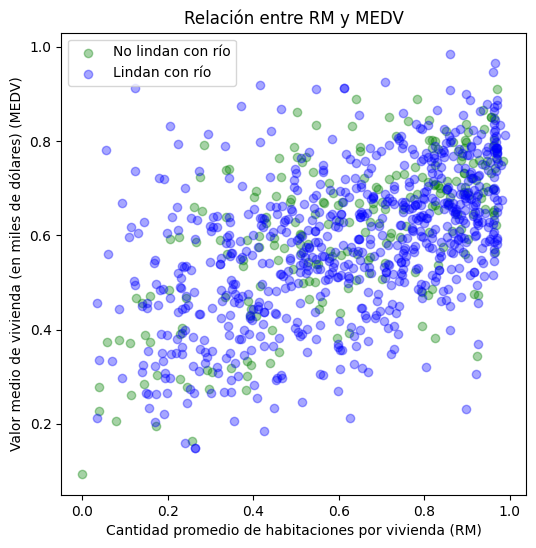

In [1113]:

# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

# Filtrar los datos por CHAS
chas_false = aux[aux["Mode"] == 0]
chas_true = aux[aux["Mode"] == 1]

# Graficar los puntos con colores diferentes
plt.scatter(chas_false["Valence"], chas_false["Danceability"], color="green", alpha=0.35, label="No lindan con río")
plt.scatter(chas_true["Valence"], chas_true["Danceability"], color="blue", alpha=0.35, label="Lindan con río")

# Agregar etiquetas a los ejes
plt.xlabel("Cantidad promedio de habitaciones por vivienda (RM)")
plt.ylabel("Valor medio de vivienda (en miles de dólares) (MEDV)")

# Agregar un título al gráfico
plt.title("Relación entre RM y MEDV")

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


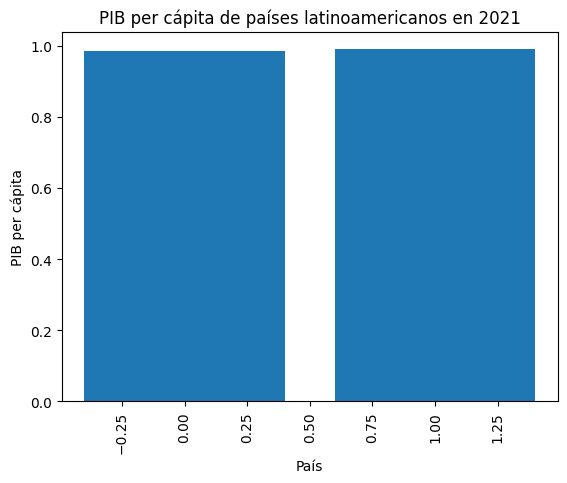

In [1114]:
# Filtrar los datos para Latinoamérica en el año 2021
#latam_data_2021 = dataset_pbi[(dataset_pbi["pais_nombre"].isin(latinoamericanos)) & (dataset_pbi["anio"] == año)]

# Crear el gráfico de barras
plt.bar(aux["Mode"], aux["Valence"])

# Agregar etiquetas a los ejes
plt.xlabel("País")
plt.ylabel("PIB per cápita")

# Agregar un título al gráfico
plt.title("PIB per cápita de países latinoamericanos en 2021")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar el gráfico
plt.show()

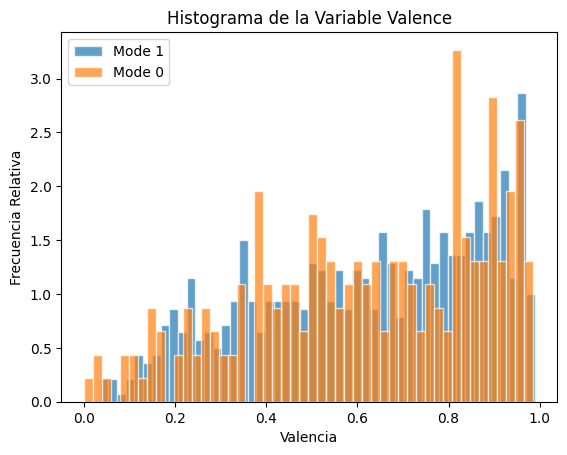

In [1115]:
# Definir el número de bins
bins = 50

mode_positive = aux[aux["Mode"] == 1]
mode_negativo = aux[aux["Mode"] == 0]

# Crear el histograma con frecuencia relativa (density=True) y bordes entre los bins
plt.hist(mode_positive["Valence"], bins=bins, edgecolor='white', density=True, alpha=0.7, label="Mode 1")
plt.hist(mode_negativo["Valence"], bins=bins, edgecolor='white', density=True, alpha=0.7, label="Mode 0")

# Agregar etiquetas a los ejes
plt.xlabel("Valencia")
plt.ylabel("Frecuencia Relativa")

# Agregar un título al gráfico
plt.title("Histograma de la Variable Valence")

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Alpha es para la transparencia en caso de superposición.


## Danceability y Year

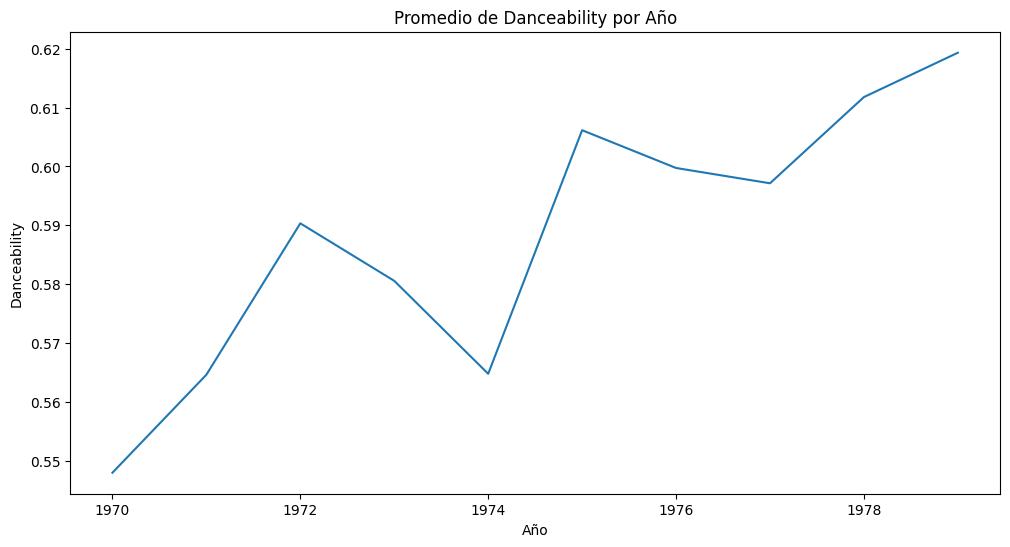

In [1116]:
danceability_per_year = danceability_dataset.groupby('Year')['Danceability'].mean().reset_index()

# Visualizar la tendencia de Speechiness a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Danceability', data=danceability_per_year)
plt.title('Promedio de Danceability por Año')
plt.ylabel('Danceability')
plt.xlabel('Año')
plt.show()